<a href="https://colab.research.google.com/github/arethel/TorchVisionTraining/blob/main/torchvision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [2]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data",
    train=True,
    download=True,
    transform = torchvision.transforms.ToTensor(),
    target_transform=None
)
test_data = datasets.FashionMNIST(
    root = "data",
    train=False,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image.shape, class_names[label]

(torch.Size([1, 28, 28]), 'Ankle boot')

torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

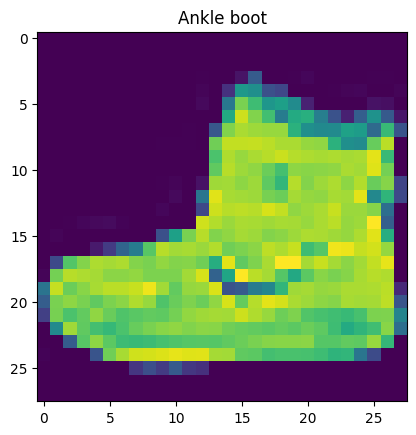

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

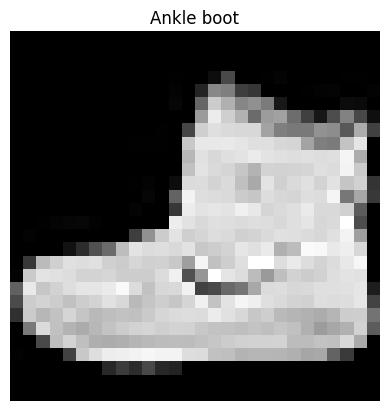

In [10]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

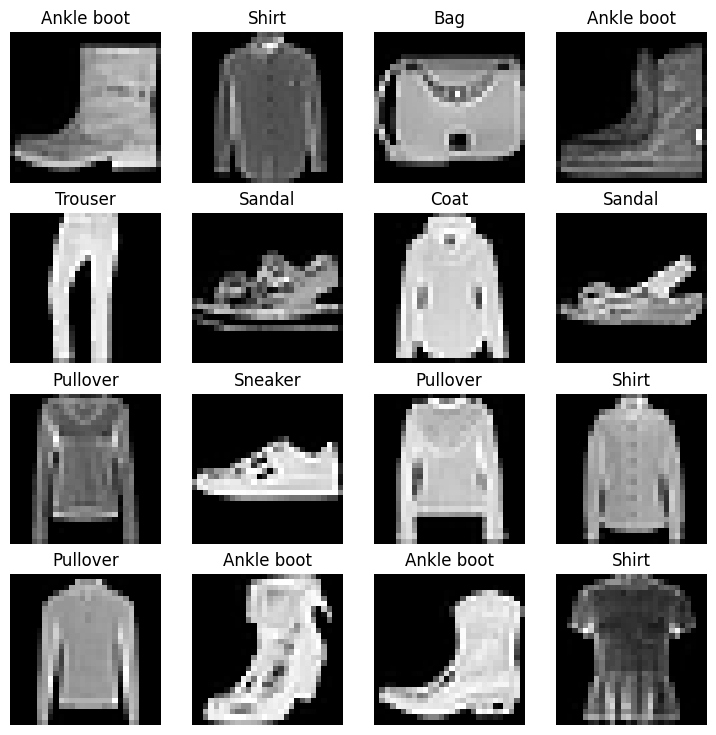

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_id = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_id]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [69]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fe430402110>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe4304020e0>)

In [14]:
print(f'{len(train_dataloader)} {len(test_dataloader)}')

1875 313


In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
tensor(6)


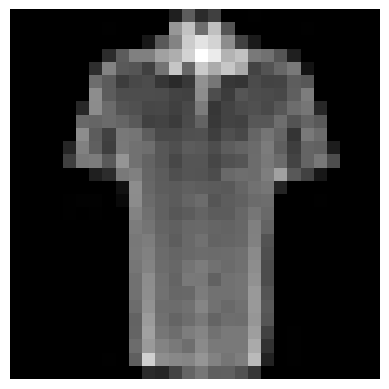

In [16]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.axis(False)
print(img.shape)
print(label)

In [17]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(output.shape)

torch.Size([1, 784])


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                 input_shape:int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape,
                      hidden_units),
            nn.Linear(hidden_units,
                      output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(784, 10, len(class_names)).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [23]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.1)

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    total_time = end - start
    print(f'Train time on {device}: {total_time:.3f} seconds')
    return total_time


In [25]:
start_time = timer()
#code
end_time = timer()
print_train_time(start=start_time, end = end_time, device="cpu")

Train time on cpu: 0.000 seconds


3.9195999761432176e-05

In [38]:
from tqdm.auto import tqdm

# torch.manual_seed(42)
# train_time_start_on_cpu = timer()

# epochs = 3

# for epoch in tqdm(range(epochs)):
#     print(f'Epoch: {epoch}\n------')

#     train_loss = 0

#     for batch, (X, y) in enumerate(train_dataloader):
#         model_0.train()

#         y_pred = model_0(X)
#         loss = loss_fn(y_pred, y)
#         train_loss +=loss

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         if batch % 400 == 0:
#             print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

#     train_loss /= len(train_dataloader)

#     test_loss, test_acc = 0, 0
#     model_0.eval()
#     with torch.inference_mode():
#         for X_test, y_test in test_dataloader:
#             test_pred = model_0(X_test)
#             test_loss += loss_fn(test_pred, y_test)
#             test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(1))

#         test_loss /= len(test_dataloader)
#         test_acc /= len(test_dataloader)

#     print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} Test accuracy: {test_acc:.4f}')


# train_time_end_on_cpu = timer()
# total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device = str(next(model_0.parameters()).device))

In [27]:
# torch.manual_seed(42)
# def eval_model(model,
#                data_loader,
#                loss_fn,
#                accuracy_fn):
#     loss, acc=0 , 0
#     model.eval()
#     with torch.inference_mode():
#         for X,y in tqdm(data_loader):
#             X, y = X.to(next(model.parameters()).device), y.to(next(model.parameters()).device)
#             y_pred = model(X)
#             loss+= loss_fn(y_pred, y)
#             acc += accuracy_fn(y, y_pred.argmax(1))

#         loss /=len(data_loader)
#         acc /= len(data_loader)

#     return {
#         "model_name": model.__class__.__name__,
#         "model_loss": loss.item(),
#         "model_acc": acc
#     }
# model_0_results = eval_model(model_0,
#                              test_dataloader,
#                              loss_fn,
#                              accuracy_fn
#                              )
# model_0_results

In [28]:
torch.cuda.is_available()

True

In [29]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [30]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [31]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784, 10, len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [32]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr = 0.1)

In [33]:
def train_step(model, data_loader, loss_fn, optimizer, accuracy_fn, device):
    train_loss, train_acc = 0, 0

    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss +=loss
        train_acc += accuracy_fn(y, y_pred.argmax(1))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # if batch % 400 == 0:
        #     print(f'Looked at {batch * len(X)}/{len(data_loader.dataset)} samples.')

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss:.5f} | Train acc {train_acc:.2f}%')

In [34]:
def test_step(model, data_loader, loss_fn, accuracy_fn, device):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss: {test_loss:.5f} | Test acc: {test_acc:2f}%\n')

In [35]:
# torch.manual_seed(42)

# from timeit import default_timer as timer
# train_time_start_on_gpu = timer()

# epochs = 3
# for epoch in tqdm(range(epochs)):
#     print(f'Epoch: {epoch}\n--------')
#     train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)

#     test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)


# train_time_end_on_gpu = timer()

# total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device)

In [36]:
model_0_results

NameError: ignored

In [ ]:
total_train_time_model_0

In [ ]:
!nvidia-smi

In [ ]:
model_1_results = eval_model(model_1,
                             test_dataloader,
                             loss_fn,
                             accuracy_fn)

In [ ]:
model_1_results

In [39]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(1,-1),
            nn.Linear(hidden_units*7*7, output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [ ]:
image.shape

In [40]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(1, 10, 10).to(device)

In [41]:
rand_image_tensor = torch.randn(size=(1,1,28,28)).to(device)
model_2(rand_image_tensor)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [42]:
from helper_functions import accuracy_fn
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)



In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n------')
    train_step(model=model_2,
               data_loader=train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)
    test_step(model=model_2,
               data_loader=test_dataloader,
               loss_fn = loss_fn,
               accuracy_fn = accuracy_fn,
               device = device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2, train_time_end_model_2, device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.59091 | Train acc 78.65%
Test loss: 0.39368 | Test acc: 85.862620%

Epoch: 1
------
Train loss: 0.36349 | Train acc 86.83%
Test loss: 0.38392 | Test acc: 86.401757%

Epoch: 2
------
Train loss: 0.32902 | Train acc 88.19%
Test loss: 0.33819 | Test acc: 87.859425%

Train time on cuda: 41.669 seconds


In [ ]:
model_2_results = eval_model(
    model_2,
    test_dataloader,
    loss_fn,
    accuracy_fn)
model_2_results

In [ ]:
model_0_results

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

In [ ]:
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

In [44]:
def make_predictions(model, data, device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)


In [56]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'T-shirt/top')

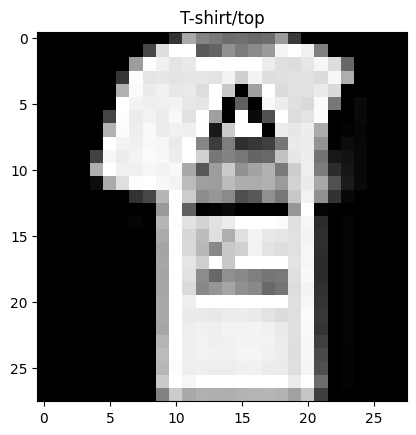

In [57]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [58]:
pred_probs = make_predictions(model_2, test_samples, device)

pred_probs[:2]

tensor([[7.6860e-01, 1.5382e-03, 1.9764e-02, 1.4274e-01, 1.2180e-03, 1.7804e-05,
         6.0446e-02, 3.4695e-05, 5.5809e-03, 5.6625e-05],
        [9.4887e-03, 2.6479e-03, 9.1594e-01, 5.1274e-03, 4.8847e-02, 3.6314e-05,
         1.7659e-02, 6.2275e-05, 1.3076e-04, 6.1148e-05]])

In [59]:
pred_classes = pred_probs.argmax(1)
pred_classes

tensor([0, 2, 0, 9, 5, 0, 1, 6, 0])

In [60]:
test_labels

[0, 2, 0, 5, 5, 0, 1, 6, 6]

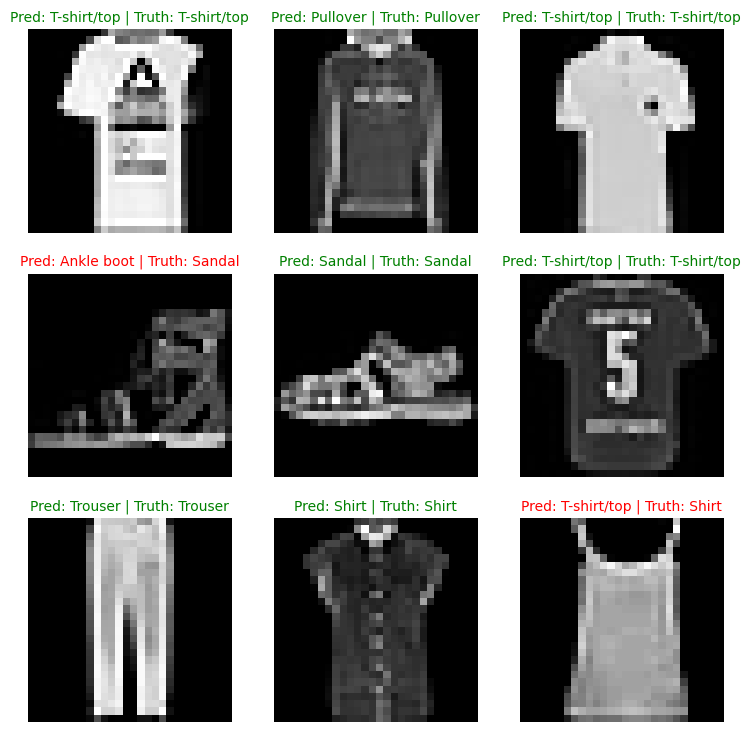

In [61]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(),cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize = 10, c='r')
    plt.axis(False)

In [70]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = "Making predictions..."):
        X, y = X.to(device), y.to(device)
        # print(y[:10])
        y_logits = model_2(X)
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [63]:
len(y_pred_tensor)

10000

In [71]:
try:
    import torchmetrics, mlxtend
    print(f'mlxtend version: {mlxtend.__version__}')
    assert int(mlxtend.__version__.split('.')[1])>=19, 'mlxtend version should be 0.19.0 or higher'
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f'mlxtend version {mlxtend.__version__}')

mlxtend version: 0.22.0


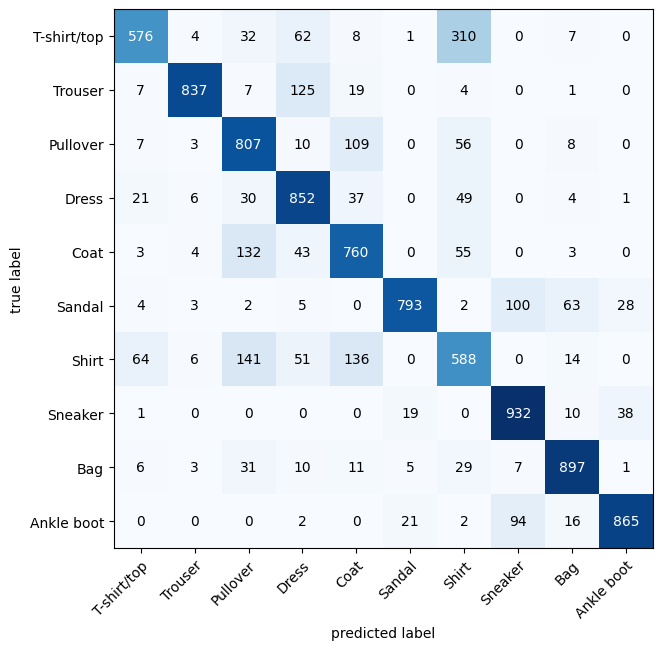

In [74]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                        target = test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

In [67]:
y_pred_tensor[:10], test_data.targets[:10]

(tensor([2, 9, 6, 6, 7, 1, 0, 7, 2, 9]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]))

In [73]:
confmat_tensor

tensor([[576,   4,  32,  62,   8,   1, 310,   0,   7,   0],
        [  7, 837,   7, 125,  19,   0,   4,   0,   1,   0],
        [  7,   3, 807,  10, 109,   0,  56,   0,   8,   0],
        [ 21,   6,  30, 852,  37,   0,  49,   0,   4,   1],
        [  3,   4, 132,  43, 760,   0,  55,   0,   3,   0],
        [  4,   3,   2,   5,   0, 793,   2, 100,  63,  28],
        [ 64,   6, 141,  51, 136,   0, 588,   0,  14,   0],
        [  1,   0,   0,   0,   0,  19,   0, 932,  10,  38],
        [  6,   3,  31,  10,  11,   5,  29,   7, 897,   1],
        [  0,   0,   0,   2,   0,  21,   2,  94,  16, 865]])